# Using WPS through Jupyter Notebook

## Introduction
The Web Processing Service (WPS) allows you to analyse the data and plot the results for easy understanding. Many different types of analyses are possible. In this demonstration we use the GEOGLAM Fractional Cover Monthly data and calculate the mean value for each time position. The values for three bands (Band 1-3) will be plotted.

In [1]:
##########################################################
# Author: Arapaut V. Sivaprasad.                         #
# Dates: Created: 09/12/2019; Last Modified: 10/2/2020  #
##########################################################

from owslib.wcs import WebCoverageService
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from netCDF4 import Dataset
import numpy as np

import warnings
warnings.filterwarnings('ignore')


### Specify the URL of GSKY server and the layer name.

### Area covered by this notebook
<img src='nsw.png' width="256">

In [2]:
# Specify the GSKY production URL here. The layer is hard coded below.
gsky_url = 'https://gsky.nci.org.au/ows/geoglam'
wcs = WebCoverageService(gsky_url, version='1.0.0')
layer = "modis_fract_cov_monthly"


### Available time positions in the database

In [3]:
tiles_list = [
'141.02,-36.88,144.26,-33.64',
'144.26,-36.88,147.50,-33.64',
'147.50,-36.88,150.74,-33.64',
'150.74,-36.88,153.98,-33.64',

'141.02,-33.64,144.26,-30.40',
'144.26,-33.64,147.50,-30.40',
'147.50,-33.64,150.74,-30.40',
'150.74,-33.64,153.98,-30.40',

'141.02,-30.40,144.26,-27.16',
'144.26,-30.40,147.50,-27.16',
'147.50,-30.40,150.74,-27.16',
'150.74,-30.40,153.98,-27.16'
]
# tiles_list

This step will take 1-2 minutes. Be patient!
........................................................................


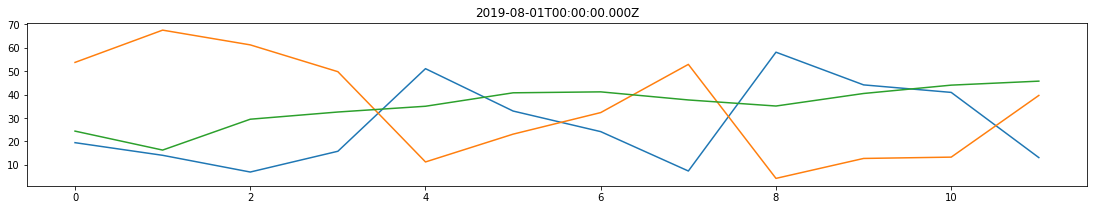

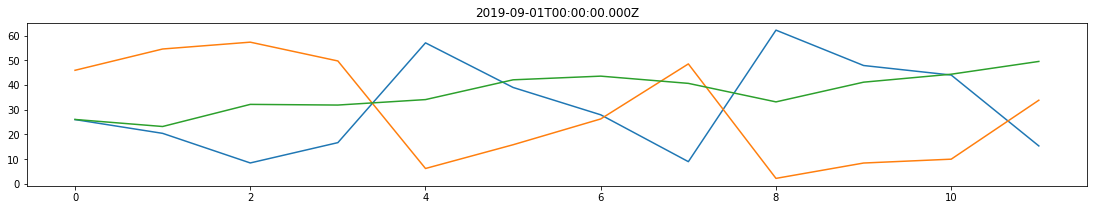

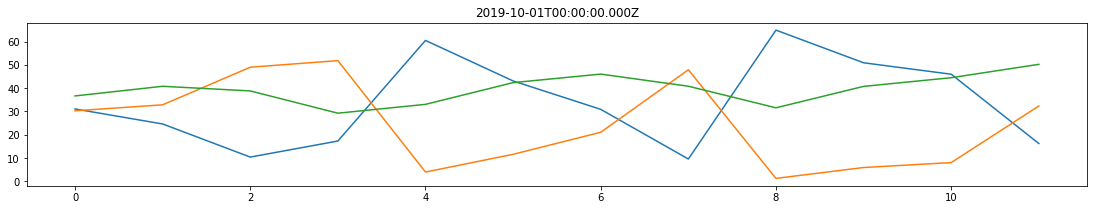

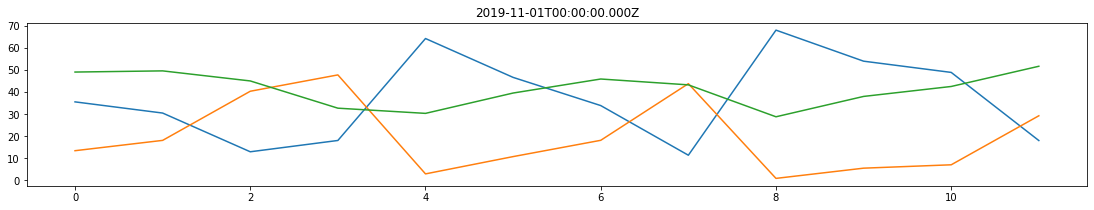

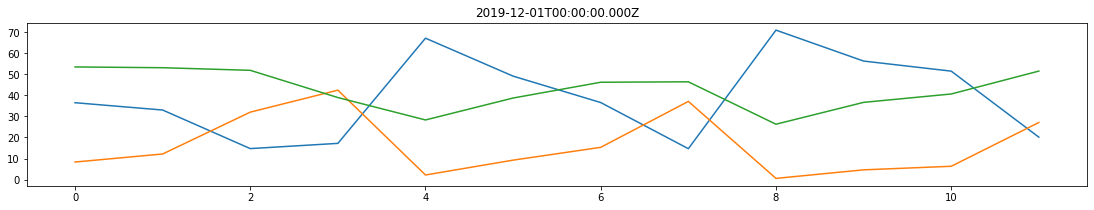

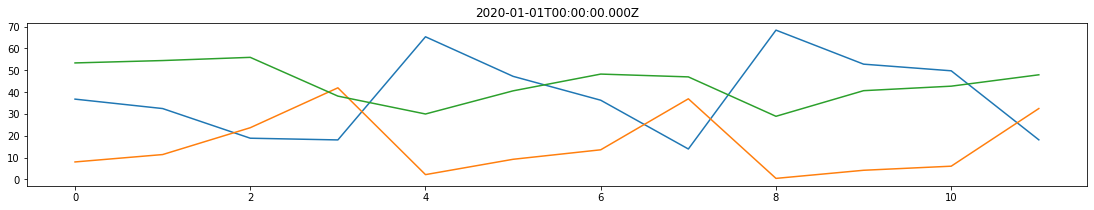

Finished!


In [4]:
l = len(wcs[layer].timepositions)
import numpy as np 
bbox = [tiles_list[0]]
a = np.empty((6,12,3),float)
k = -1
# timeposition = wcs[layer].timepositions[l-1]
print("This step will take 1-2 minutes. Be patient!")
for i in range(l-6,l):
    timeposition = wcs[layer].timepositions[i]
    k += 1
    for j in range(len(tiles_list)):
        bbox = [tiles_list[j]]
        output = wcs.getCoverage(identifier=layer, Styles='',
             time=[wcs[layer].timepositions[i]],
             bbox=bbox,format='NetCDF',
             crs='EPSG:4326', width=256, height=256)
        nc = Dataset('dtemp.nc','r',diskless=True,persist=False, memory=output.read())
        red = nc.variables['Band1'][:]
        green = nc.variables['Band2'][:]
        blue = nc.variables['Band3'][:]
        print(".", end='')
        # Calculate the mean values
        rm = red.mean() # mean
        a[k, j, 0] = rm
        gm = green.mean() # mean
        a[k, j, 1] = gm
        bm = blue.mean() # mean
        a[k, j, 2] = bm
print("")        
k = -1
for i in range(l-6,l):
    k += 1
    timeposition = wcs[layer].timepositions[i]
    plt.figure(figsize=(19, 3))
    title = str(timeposition)
    plt.title(title)
    ax = plt.subplot(111)
    ax.plot(a[k])
    plt.show()      
print("Finished!")    


## ______End of Notebook_______